![Caratula](./images/Caratula.jpg)

# Trabajo Final: Análisis de Deserción de Clientes

**Fecha:** 16 de febrero 2026


**Datasets:** Requerimientos y clientes

**Integrante:**

Chávez Ramírez, Jonathan Uriel

## **1. Descripción del Problema:**

La entidad financiera necesita identificar a sus clientes personas jurídicas (PYMES o empresas) con alto riesgo de abandono (attrition) de sus productos o servicios, con el objetivo de implementar estrategias de retención proactivas.

![bbva](./images/bbva.jpg)

## **2. Objetivo:**

Para lograrlo, se desarrollará un modelo un modelo de clasificación para predecir la probabilidad que los clientes de Persona Juridica de una entidad financiera peruana (BBVA), dejen de usar sus productos o servicios (attrition) que priorice la variable "attrition" como objetivo (variable dependiente), utilizando datos históricos y comportamentales de los clientes.

**Beneficios de la solución:**

Este modelo permitirá:

1. Predecir qué clientes jurídicos tienen mayor probabilidad de dejar los productos o servicios.

2. Clasifica a estos clientes para ofrecerles beneficios personalizados (descuentos, mejoras en condiciones, etc.).

3. Reducir la tasa de abandono, incrementando la fidelización y el valor de por vida del cliente (Customer Lifetime Value - CLV).

El enfoque incluirá técnicas de machine learning y análisis de datos para maximizar la precisión y utilidad del modelo.

# # Análisis Exploratorio de Datos - Deserción de Clientes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import joblib
import os

In [3]:
# Configuración
pd.set_option('display.max_columns', 200)
sns.set_style('whitegrid')

# ## 1. Carga de Datos

In [4]:
# Cargar datos
client_df = pd.read_csv('../data/raw/train_clientes.csv')
requirement_df = pd.read_csv('../data/raw/train_requerimientos.csv')

print(f"Clientes shape: {client_df.shape}")
print(f"Requerimientos shape: {requirement_df.shape}")

Clientes shape: (70000, 60)
Requerimientos shape: (51417, 6)


In [5]:
# Ver primeras filas
display(client_df.head())
display(requirement_df.head())

,ID_CORRELATIVO,CODMES,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,ATTRITION,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,SDO_ACTIVO_MENOS3,SDO_ACTIVO_MENOS4,SDO_ACTIVO_MENOS5,RESUMEN_SDOACT,FLG_SEGURO_MENOS0,FLG_SEGURO_MENOS1,FLG_SEGURO_MENOS2,FLG_SEGURO_MENOS3,FLG_SEGURO_MENOS4,FLG_SEGURO_MENOS5,RESUMEN_SEGURO,RANG_NRO_PRODUCTOS_MENOS0,FLG_NOMINA,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL1_MENOS1,NRO_ACCES_CANAL1_MENOS2,NRO_ACCES_CANAL1_MENOS3,NRO_ACCES_CANAL1_MENOS4,NRO_ACCES_CANAL1_MENOS5,RESUMEN_CANAL1,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL2_MENOS1,NRO_ACCES_CANAL2_MENOS2,NRO_ACCES_CANAL2_MENOS3,NRO_ACCES_CANAL2_MENOS4,NRO_ACCES_CANAL2_MENOS5,RESUMEN_CANAL2,NRO_ACCES_CANAL3_MENOS0,NRO_ACCES_CANAL3_MENOS1,NRO_ACCES_CANAL3_MENOS2,NRO_ACCES_CANAL3_MENOS3,NRO_ACCES_CANAL3_MENOS4,NRO_ACCES_CANAL3_MENOS5,RESUMEN_CANAL3,NRO_ENTID_SSFF_MENOS0,NRO_ENTID_SSFF_MENOS1,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,RESUMEN_ENTIDADES,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5,RESUMEN_SALDO_FUERA
0,35653,201208,1,Rang_ingreso_06,Lima,25.0,6.0,0,Rango_SDO_09,0,0,0,0,0,0,0,1,1,1,1,1,1,6,Rango_04,0,2,1,0,2,4,1,10,8,11,14,12,8,12,65,3,0,1,6,2,5,17,2,1,1,1,1,1,7,1,0,0,0,0,0,1
1,66575,201208,1,Rang_ingreso_03,Provincia,27.0,0.0,0,Rango_SDO_01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,24,1,1,1,1,1,1,6,0,0,0,0,0,0,0
2,56800,201208,1,Rang_ingreso_01,Provincia,34.0,4.0,0,Rango_SDO_02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,2,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8410,201208,1,Rang_ingreso_04,Provincia,63.0,5.0,0,Rango_SDO_03,0,0,0,0,0,0,0,1,1,1,1,1,1,6,Rango_03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,4,3,3,3,3,3,3,18,1,1,1,1,1,1,6
4,6853,201208,1,NaN,Lima,25.0,0.0,0,Rango_SDO_01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rango_01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,ID_CORRELATIVO,TIPO_REQUERIMIENTO2,DICTAMEN,CODMES,PRODUCTO_SERVICIO_2,SUBMOTIVO_2
0,64216,Reclamo,NO PROCEDE,201206,Producto 20,Submotivo 43
1,64216,Solicitud,NO PROCEDE,201205,Producto 20,Submotivo 157
2,35660,Reclamo,PROCEDE TOTAL,201208,Producto 17,Submotivo 89
3,22480,Reclamo,PROCEDE TOTAL,201208,Producto 07,Submotivo 27
4,24691,Solicitud,PROCEDE TOTAL,201208,Producto 20,Submotivo 132


# ## 2. Análisis de Valores Nulos

In [6]:
# Clientes
client_nulos = client_df.isnull().sum()
client_nulos[client_nulos > 0]

RANG_INGRESO           9417
FLAG_LIMA_PROVINCIA    3386
EDAD                   5326
ANTIGUEDAD             1762
dtype: int64

In [7]:
# Requerimientos - limpiar nulos
print(requirement_df.isnull().sum())
requirement_df = requirement_df.dropna(subset=['DICTAMEN'])
print(f"Shape después limpieza: {requirement_df.shape}")

ID_CORRELATIVO         0
TIPO_REQUERIMIENTO2    0
DICTAMEN               1
CODMES                 0
PRODUCTO_SERVICIO_2    0
SUBMOTIVO_2            0
dtype: int64
Shape después limpieza: (51416, 6)


# ## 3. Procesamiento de Requerimientos

In [8]:
# Pivot tables para features de requerimientos
type_requeriment = pd.crosstab(
    requirement_df['ID_CORRELATIVO'], 
    requirement_df['TIPO_REQUERIMIENTO2']
).reset_index()

dictamen = pd.crosstab(
    requirement_df['ID_CORRELATIVO'], 
    requirement_df['DICTAMEN']
).reset_index()

codmes = pd.crosstab(
    requirement_df['ID_CORRELATIVO'], 
    requirement_df['CODMES']
).reset_index()


In [9]:
# Productos top
top_products = requirement_df['PRODUCTO_SERVICIO_2'].value_counts().head(3).index
productos = pd.crosstab(
    requirement_df['ID_CORRELATIVO'], 
    requirement_df['PRODUCTO_SERVICIO_2']
)[top_products].reset_index()

In [10]:
# Submotivos top
top_submotivos = requirement_df['SUBMOTIVO_2'].value_counts().head(3).index
submotivos = pd.crosstab(
    requirement_df['ID_CORRELATIVO'], 
    requirement_df['SUBMOTIVO_2']
)[top_submotivos].reset_index()

In [11]:
# Merge de features de requerimientos
requeriment_features = type_requeriment.merge(
    dictamen, on='ID_CORRELATIVO', how='left'
).merge(
    codmes, on='ID_CORRELATIVO', how='left'
).merge(
    productos, on='ID_CORRELATIVO', how='left'
).merge(
    submotivos, on='ID_CORRELATIVO', how='left'
)

In [12]:
# Rellenar NaN con 0
requeriment_features = requeriment_features.fillna(0)

# ## 4. Merge Final de Datos

In [13]:
# Merge con datos de clientes
final_df = client_df.merge(requeriment_features, on='ID_CORRELATIVO', how='left')
final_df = final_df.fillna(0)

In [14]:
print(f"Dataset final shape: {final_df.shape}")

Dataset final shape: (70000, 77)


# ## 5. Análisis de Variable Target

In [15]:
# Distribución de deserción
target_dist = final_df['ATTRITION'].value_counts(normalize=True)
print(target_dist)

ATTRITION
0    0.8454
1    0.1546
Name: proportion, dtype: float64


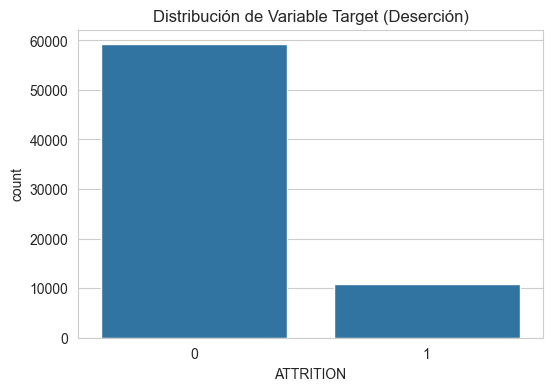

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=final_df, x='ATTRITION')
plt.title('Distribución de Variable Target (Deserción)')
plt.show()

# ## 6. Análisis de Variables Numéricas

In [17]:
# Seleccionar variables numéricas
numeric_cols = final_df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['ID_CORRELATIVO', 'CODMES', 'ATTRITION']]

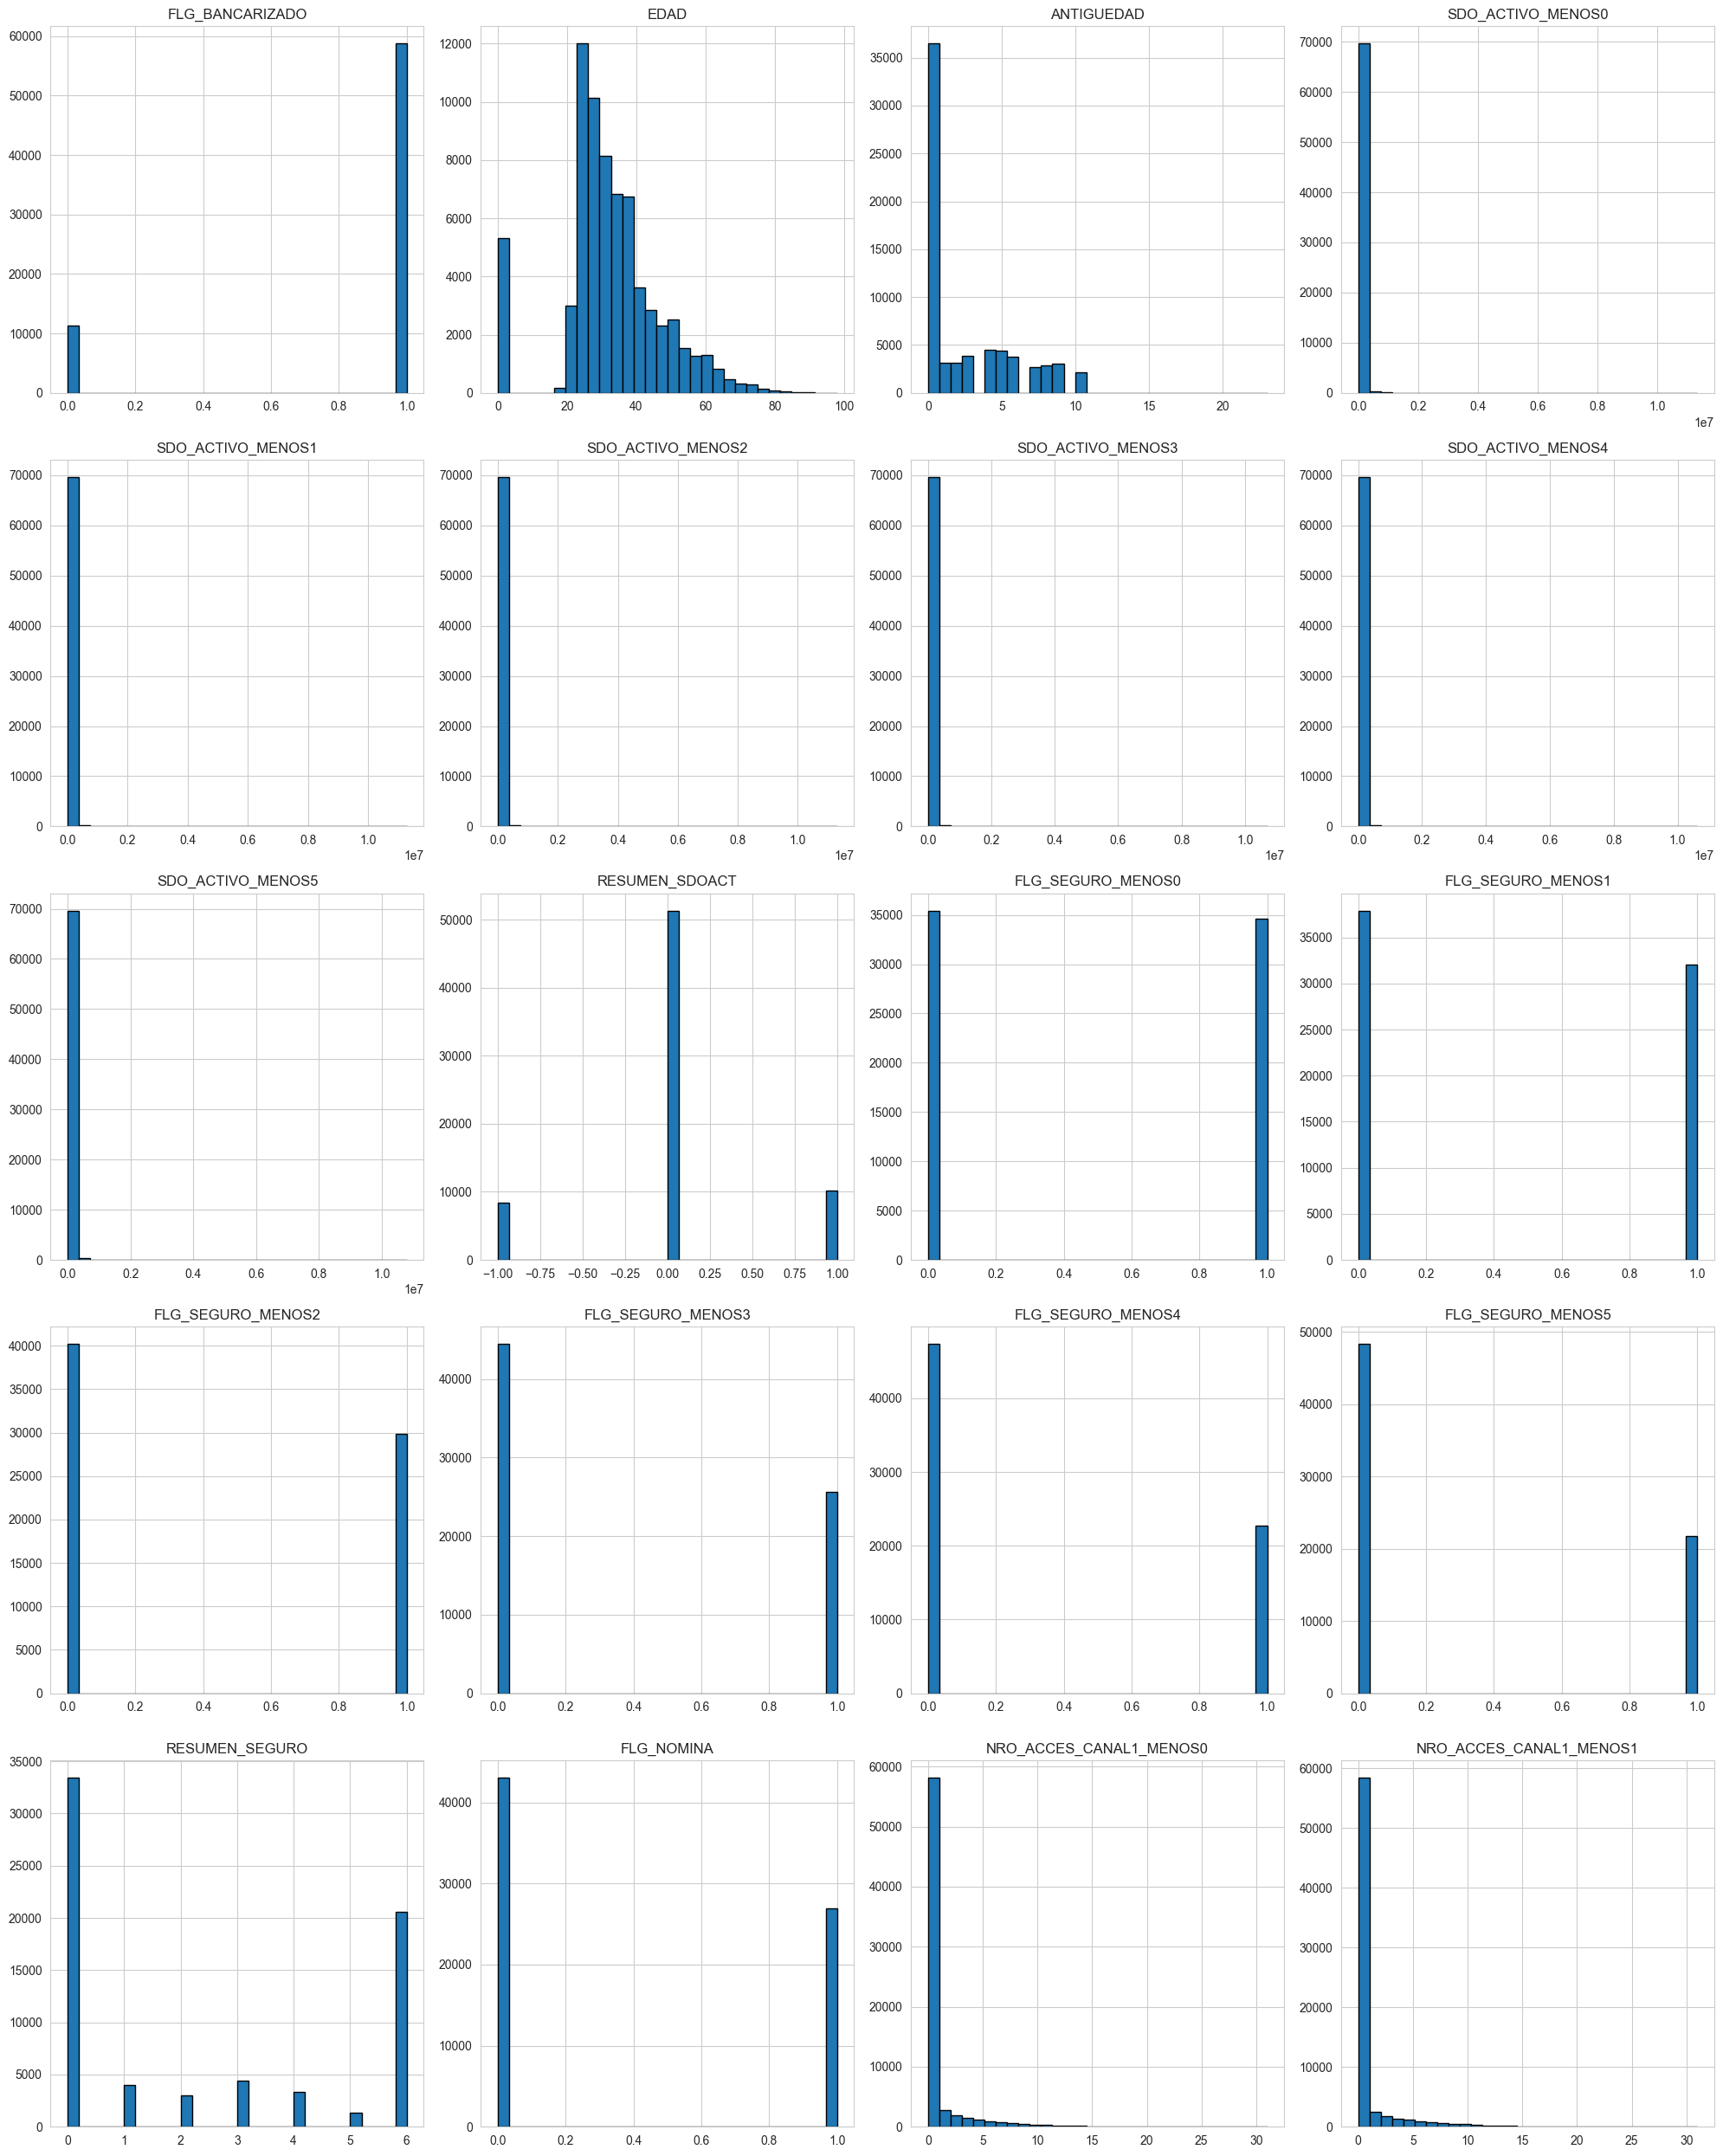

In [18]:
# Visualizar distribuciones
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.ravel()

for i, col in enumerate(numeric_cols[:20]):
    axes[i].hist(final_df[col], bins=30, edgecolor='black')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

# ## 7. Variables Categóricas

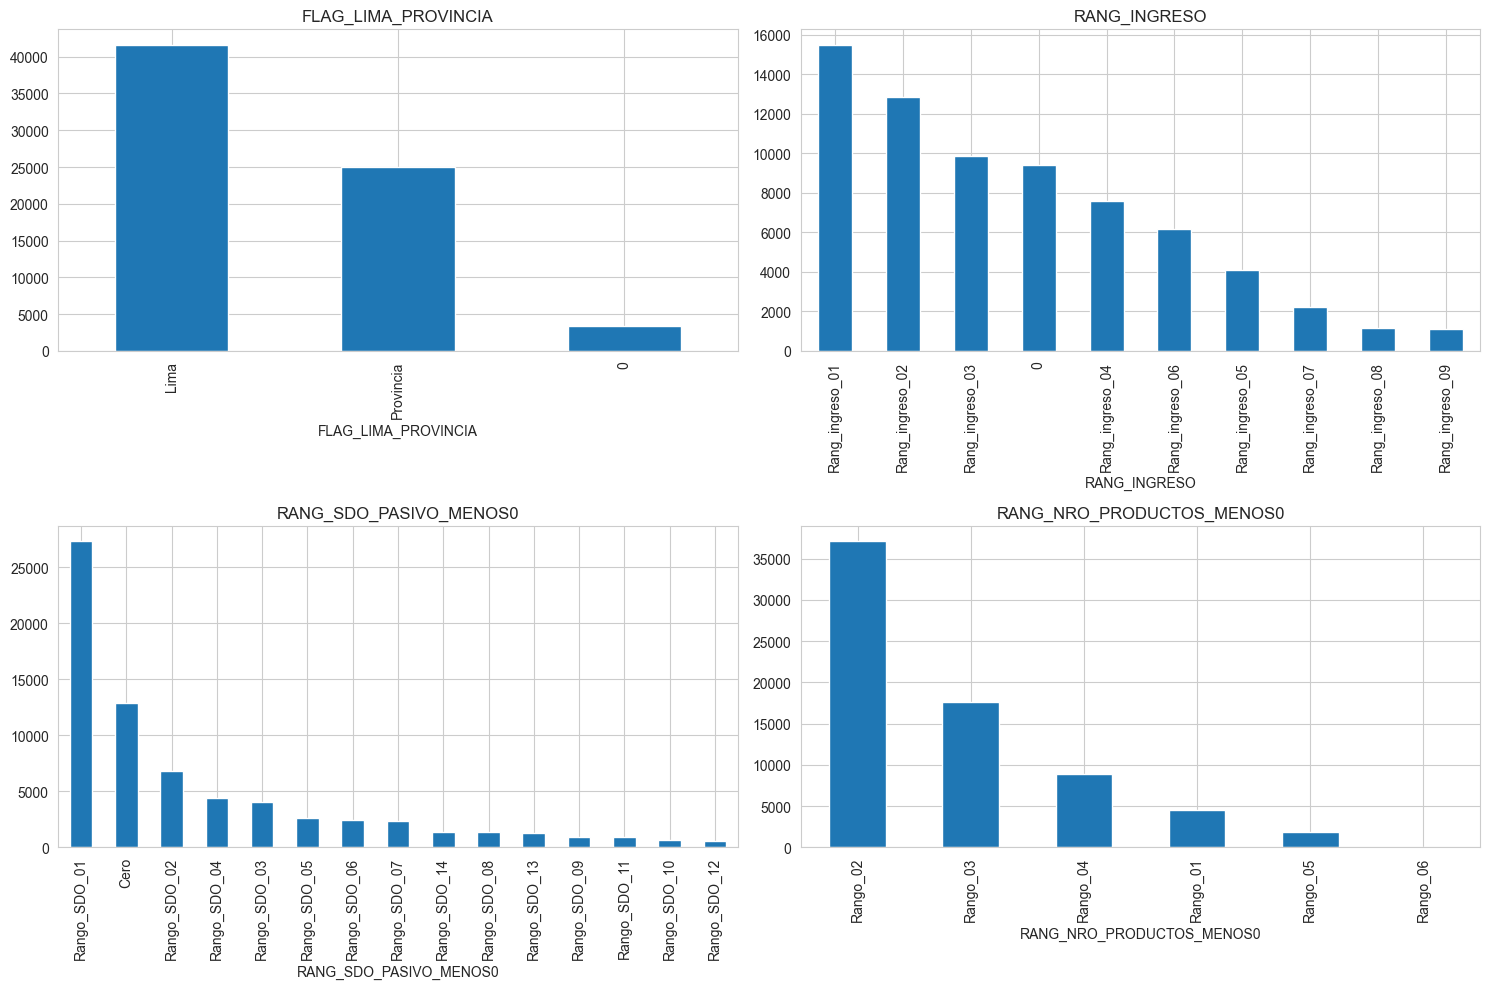

In [19]:
categorical_cols = ['FLAG_LIMA_PROVINCIA', 'RANG_INGRESO', 'RANG_SDO_PASIVO_MENOS0', 
                    'RANG_NRO_PRODUCTOS_MENOS0']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if col in final_df.columns:
        final_df[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(col)

plt.tight_layout()
plt.show()